In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#displaying column and data in dictionary format for 'station'
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb0bdaf14a8>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [10]:
#displaying column and data in dictionary format for 'measurement'
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb0bdaf1a20>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent

('2017-08-23')

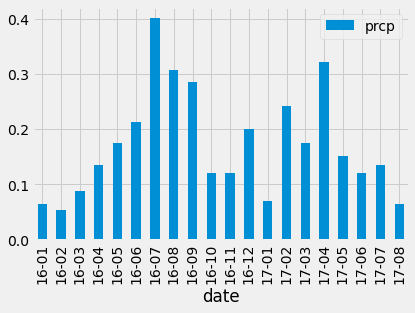

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
twelve_months = dt.datetime.strptime('2017-08-23','%Y-%M-%d')- dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date>=twelve_months).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prep_data = pd.DataFrame(data)

prep_data
# Sort the dataframe by date
prep_data['date'] = pd.to_datetime(prep_data['date'])
prep=prep_data.groupby(prep_data['date'].dt.strftime('%y-%m'))['prcp'].mean()
prep_avg = pd.DataFrame(prep)
prep_avg
# Use Pandas Plotting with Matplotlib to plot the data
prep_avg.plot.bar()
plt.show()



In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prep_avg.describe()

,prcp
count,20.000000
mean,0.172188
std,0.097016
min,0.054444
25%,0.112023
50%,0.143386
75%,0.219512
max,0.401656


# Exploratory Station Analysis

In [71]:
# Design a query to calculate the total number stations in the dataset
total_stations = len(session.query(station.station).all())
total_stations

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations= session.query(measurement.station, station.station).count()
most_active_stations

175950

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [34]:
# Close Session
session.close()